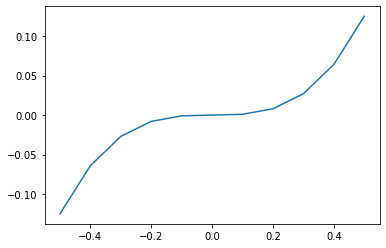

In [16]:
# demonstrate simple x^2 function
from matplotlib import pyplot

# simple function
def calculate(x):
	return x * x*x

# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

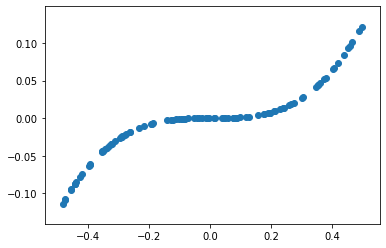

In [17]:
# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1 *X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [58]:
# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=2)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=2)
		print(i, acc_real, acc_fake)

# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 1.0 0.203125
1 1.0 0.171875
2 1.0 0.171875
3 1.0 0.234375
4 0.984375 0.265625
5 1.0 0.28125
6 0.875 0.515625
7 0.578125 0.5
8 0.65625 0.390625
9 0.65625 0.4375
10 0.5 0.484375
11 0.421875 0.59375
12 0.5 0.53125
13 0.515625 0.578125
14 0.390625 0.671875
15 0.5625 0.5625
16 0.53125 0.78125
17 0.328125 0.703125
18 0.421875 0.625
19 0.296875 0.671875
20 0.4375 0.71875
21 0.359375 0.609375
22 0.421875 0.625
23 0.40625 0.75
24 0.21875 0.734375
25 0.34375 0.84375
26 0.296875 0.734375
27 0.40625 0.703125
28 0.34375 0.65625
29 0.359375 0.75
30 0.3125 0.859375
31 0.375 0.828125
32 0.390625 0.84375
33 0.328125 0.796875
34 0.40625 0.890625
35 0.375 0.890625
36 0.3125 0.953125
37 0.234375 0.984375
38 0.234375 1.0
39 0.171875 1.0
40 0.265625 0.984375
41 0.28125 1.0
42 0.375 1.0
43 0.3125 1.0
44 0.21875 1.0
45 0.28125 1.0
46 0.234375 1.0
47 0.28125 1.0
48 0.234375 1.0
49 0.28125 1.0
50 0.328125 1.0
51 0.171875 1.0
52 0.296875 1.0
53 0.296875 1.0
54 0.375 1.0
55 0.28125 1.0
56 0.296875 0.984375
57 0

503 1.0 0.953125
504 1.0 0.9375
505 1.0 0.9375
506 1.0 0.921875
507 1.0 0.921875
508 1.0 0.9375
509 1.0 0.9375
510 1.0 0.953125
511 1.0 0.875
512 1.0 0.921875
513 1.0 0.921875
514 1.0 0.890625
515 1.0 0.890625
516 1.0 0.921875
517 1.0 0.9375
518 1.0 0.921875
519 1.0 0.875
520 1.0 0.921875
521 1.0 0.953125
522 1.0 0.9375
523 1.0 0.90625
524 1.0 0.90625
525 1.0 0.90625
526 1.0 0.953125
527 1.0 0.890625
528 1.0 0.953125
529 1.0 0.859375
530 1.0 0.921875
531 1.0 0.921875
532 1.0 0.953125
533 1.0 0.96875
534 1.0 0.9375
535 1.0 0.890625
536 1.0 0.859375
537 1.0 0.921875
538 1.0 0.921875
539 1.0 0.9375
540 1.0 0.96875
541 1.0 0.953125
542 1.0 0.96875
543 1.0 0.9375
544 1.0 0.859375
545 1.0 0.96875
546 1.0 0.875
547 1.0 0.9375
548 1.0 0.953125
549 1.0 0.9375
550 1.0 0.90625
551 1.0 0.875
552 1.0 0.96875
553 1.0 0.921875
554 1.0 0.875
555 1.0 0.90625
556 1.0 0.9375
557 1.0 0.9375
558 1.0 0.9375
559 1.0 0.921875
560 1.0 0.953125
561 1.0 0.875
562 1.0 0.859375
563 1.0 0.96875
564 1.0 0.984375
565

In [70]:
# define the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='tanh'))
    return model

# define the discriminator model
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
#plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)
#plot_model('model')

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_68 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_69 (Dense)             (None, 2)                 62        
Total params: 632
Trainable params: 632
Non-trainable params: 0
_________________________________________________________________


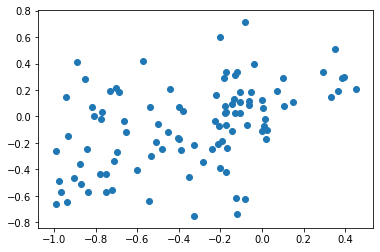

In [71]:
# define and use the generator model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()

# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

In [52]:
generate_latent_points(5,100).shape

(100, 5)

In [72]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

In [73]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_40 (Sequential)   (None, 2)                 632       
_________________________________________________________________
sequential_39 (Sequential)   (None, 1)                 886       
Total params: 1,518
Trainable params: 632
Non-trainable params: 886
_________________________________________________________________


In [69]:
'''# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)'''

"# train the composite model\ndef train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):\n\t# manually enumerate epochs\n\tfor i in range(n_epochs):\n\t\t# prepare points in latent space as input for the generator\n\t\tx_gan = generate_latent_points(latent_dim, n_batch)\n\t\t# create inverted labels for the fake samples\n\t\ty_gan = ones((n_batch, 1))\n\t\t# update the generator via the discriminator's error\n\t\tgan_model.train_on_batch(x_gan, y_gan)"

In [74]:
# train a generative adversarial network on a one-dimensional function

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()



1999 0.550000011920929 0.9399999976158142


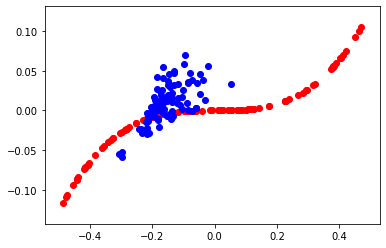

3999 0.5699999928474426 0.550000011920929


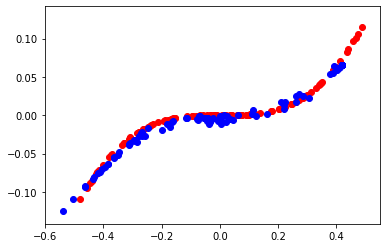

5999 0.3400000035762787 0.44999998807907104


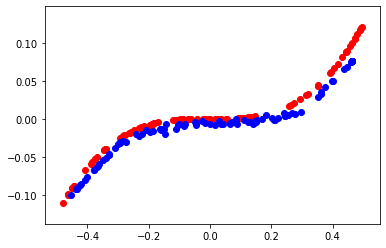

7999 0.8999999761581421 0.9200000166893005


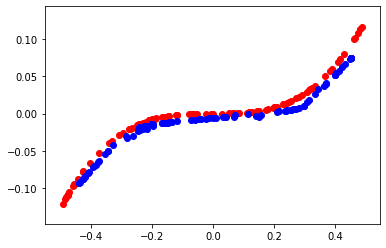

9999 0.5199999809265137 0.4099999964237213


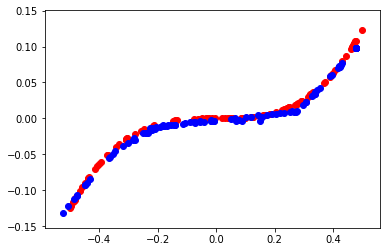

In [75]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

# train model
train(generator, discriminator, gan_model, latent_dim)